# Exame 22/23

In [2]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

import time

# Problema 1

Podemos obter a expressão do enunciado fatorizando $V_0$:
$$
\begin{align*}
&\ \left[-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x)\right]\psi(x) = E\psi(x)
\\\\
\Leftrightarrow&\ V_0\left[-\frac{L^2}{2}\frac{\partial^2}{\partial x^2} + \frac{V(x)}{V_0}\right]\psi(x) = E\psi(x)
\\\\
\Leftrightarrow&\ -\frac{L^2}{2}\frac{\partial^2}{\partial x^2} + \frac{V(x)}{V_0}\psi(x) = \frac{E}{V_0}\psi(x)
\end{align*}
$$

## Alínea 1.1

Podemos reparar que o Hamiltoniano é uma matriz simétrica, para simplificar os cálculos:

$$
\begin{align*}
H_{mn} &= \frac{(\pi n)^2}{L}\delta_{nm} + \frac2L\int_0^L \sin\left(\frac{\pi m x}{L}\right)\hat V(x)\sin\left(\frac{\pi n x}{L}\right)
\\\\
H_{nm} &= \frac{(\pi m)^2}{L}\delta_{mn} + \frac2L\int_0^L \sin\left(\frac{\pi n x}{L}\right)\hat V(x)\sin\left(\frac{\pi m x}{L}\right)
\end{align*}
$$

Usando a definição do delta de Kronecker, temos que $H_{nm} = H_{mn}$.

Aqui usamos $\hat V(x) = V(x)/V_0$.

In [3]:
def simpson(start: float, end: float, func: Callable, N: int) -> float:
    """
        Calcula o integral de `func` de `start` a `end` com N passos usando a regra de Simpson. Devolve apenas o valor final se `final == True`.
    """
    
    # Verificar que N é par
    N = (N//2) * 2

    # Abcissas
    h = (end - start) / N
    tt = np.linspace(start, end, N + 1)
    vv = func(tt)

    # Área segmentos
    aa = vv[:-2:2] + 4 * vv[1:-1:2] + vv[2: :2]
    integral = h * (aa.cumsum()) / 3

    return integral[-1]

In [4]:
# Parâmetros (SI)
a = 1 
L = 10

def hamiltoniano(M: int, V: Callable, N: int=2000) -> np.ndarray:
    """
        Devolve uma matriz `M` por `M` com os elementos do hamiltoniano do problema dado pelo potencial `V`. 

        Calcula os integrais usando a regra de Simpson com `N` intervalos.
    """
    global a, L

    H = np.zeros((M, M))

    # Calcular o elemento mn
    # Temos em conta o facto de os índices algébricos começarem em 1 e os do Pyhton começarem em 0
    for m in range(1, M+1):
        for n in range(m, M+1):
            if m == n:
                H[m-1, n-1] += (np.pi * n)**2 / L
            
            def integranda(x: np.ndarray) -> np.ndarray:
                return np.sin(np.pi * m * (x/L)) * np.sin(np.pi * n * (x/L)) * V(x)

            H[m-1, n-1] += (2/L) * simpson(0, L, integranda, N)
    
    # Usar a simetria de H
    for m in range(1, M+1):
        for n in range(1, m):
            H[m-1, n-1] = H[n-1, m-1]
    
    return H


# Potencial em jogo
def Vhat(x: np.ndarray) -> np.ndarray:
    global a

    return np.sqrt((x/a-6) ** 4 + (13/110) * (x/a - 6)**5)


# Testei para vários valores de INT e a partir de 2000 não vemos alterações nos elementos da matriz 
H = hamiltoniano(4, Vhat)
print(H)

[[ 4.50977484  2.34013744  2.96227187 -0.40563919]
 [ 2.34013744 10.43292803  1.93449825  3.45805454]
 [ 2.96227187  1.93449825 15.86351291  1.79808622]
 [-0.40563919  3.45805454  1.79808622 22.93985783]]


## Alínea 1.2

Para diagonalizar a matriz $H_{mn}$ podemos usar a sua decomposição QR (que podemos obter por exemplo pelo método de Gram-Schmidt) como se apresenta abaixo:

**Notação**: Vamos usar $H_{mn} = A$ para facilitar a escrita.

1. Escrevemos $A$ do seguinte modo:
$$
\begin{align*}
A = Q_0R_0 &\Leftrightarrow R_0 = Q_0^{-1}A \Leftrightarrow
\\\\
&\Leftrightarrow R_0 = Q_0^TA
\end{align*}
$$

2. Geramos uma nova matriz $A_1$:
$$
A_1 = R_0Q_0 = Q_0^TAQ_0 
$$

3. Escrevemos a sua decomposição QR:
$$
\begin{align*}
A_1 = Q_1R_1 &\Leftrightarrow R_1 = Q_1^{-1}A_1 \Leftrightarrow
\\\\
&\Leftrightarrow R_1 = Q_1^TA_1
\end{align*}
$$

4. Geramos uma nova matriz $A_2$:
$$
\begin{align*}
A_2 &= R_1Q_1 =
\\\\
&=  Q_1^TA_1Q_1 =
\\\\
&= Q_1^TQ_0^TAQ_0Q_1
\end{align*}
$$

5. Continuamos este processo até um passo $N$:
$$
\begin{align*}
A_N = Q_{N-1}^T\cdots Q_1^TQ_0^TAQ_0Q_1\cdots Q_{N-1}
\end{align*}
$$

Quando $N \to +\infty$ os elementos fora da diagonal vão para zero, pelo que $A_N$ será uma matriz diagonal!

Definindo:
$$
Q_\text{Total} = Q = Q_0Q_1\cdots Q_{N-1}
$$

Temos que:
$$
D = Q^TAQ
$$

Onde $D$ é uma matriz diagonal (aproximadamente diagonal para $N$ finito). Temos então que:
- As colunas de $Q$ são os vetores próprios de $A$.
- Os elementos de $D$ são os valores próprios de $A$.

---

Como $H_{mn}$ é uma matriz simétrica, sabemos que pode ser diagonalizada (devido ao teorema espetral). Ou seja, sabemos que este método irá funcionar, por isso é que o podemos usar!

Vamos supor que usamos o algoritmo de Gram-Schmidt para obter a decomposição QR da matriz. Nesse caso a obtenção da decomposição QR de uma matriz $M \times M$ é da ordem $O(M^3)$ pois fazemos $M$ passos e cada passo é da ordem $M^2$ (o passo $i$ envolve calcular $i-1$ produtos internos entre vetores com $M$ elementos).

Nesse caso, como multiplicar duas matrizes $M \times M$ também é $O(M^3)$, podemos fazer o seguinte raciocínio:
1. Para obter $A_i$ a partir de $A_{i-1}$ fazemos uma decomposição QR e duas multiplicações entre matrizes $M \times M$. Logo em cada passo fazemos 3 operações que escalam com $O(M^3)$.

2. Fazemos $N$ passos no total.

Logo, para um $N$ fixo este processo escala com $O(M^3)$. Se em vez de fixarmos $N$ fixarmos o erro máximo (medido pelo valor máximo dos elementos fora da diagonal) obtemos um efeito semelhante!

## Alínea 1.3

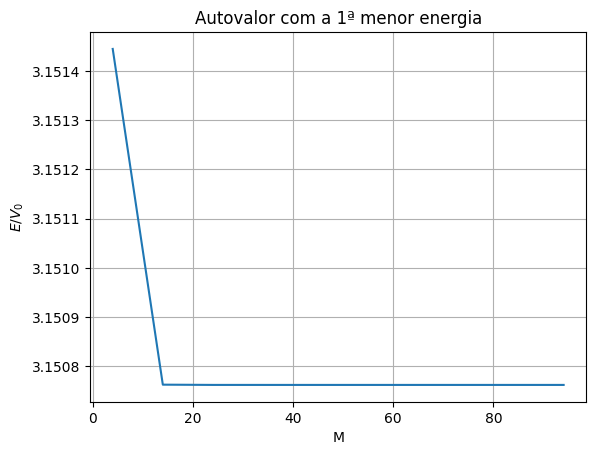

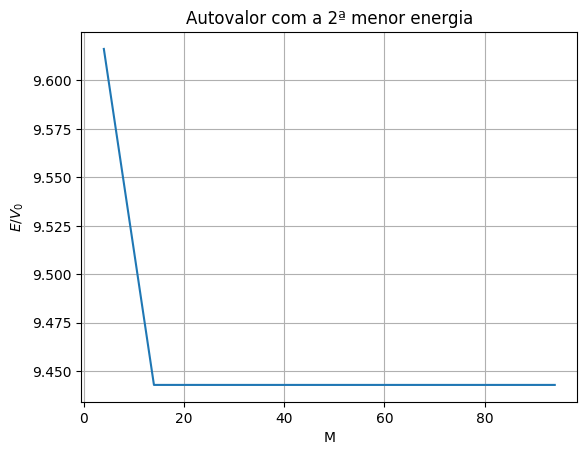

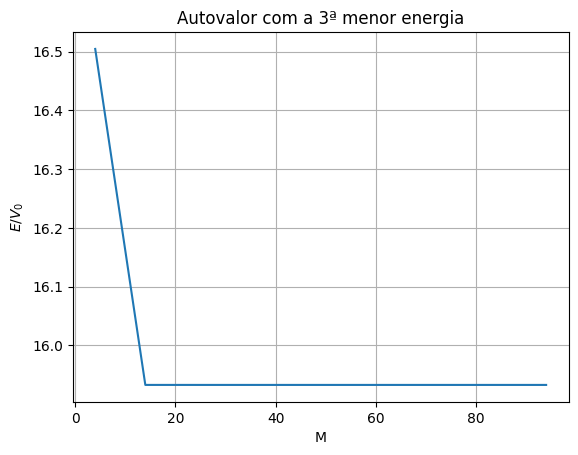

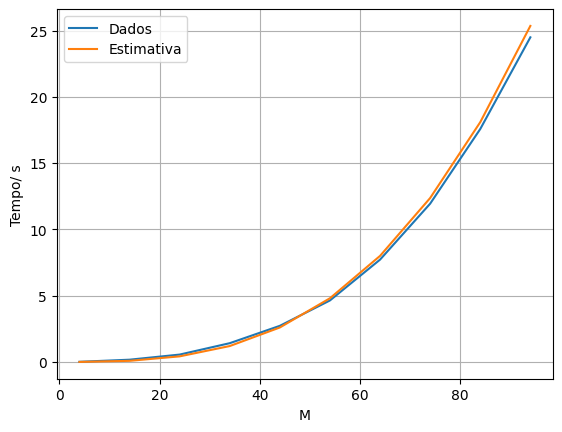

In [8]:
def qrgram(Ao: np.ndarray, needR: bool=True) -> tuple[np.ndarray, np.ndarray]:
    """
        Dada uma matriz quadrada `Ao` calcula a sua decomposição QR usando o método de Gram-Schmidt, apenas devolve `R` se `needR = True`

        ### Retorno
        Q: Matriz Q da decomposição QR
        R: Matriz R da decomposição QR (caso needR=False devolve uma matriz com zeros)
    """

    # Evitar side effects
    A = np.copy(Ao)

    N = A.shape[0]
    Q, R = np.zeros((N, N)), np.zeros((N, N))
    
    # Iteramos sobre as colunas
    for i in range(0, N):
        v_i = np.copy(A[:, i])
        for j in range(0, i):
            v_i -= (Q[:, j] @ A[:, i]) * Q[:, j]

        Q[:, i] = v_i / np.linalg.norm(v_i)

    if needR:
        R = Q.transpose() @ A
    
    return Q, R


def eigenfinder(Ao: np.ndarray, eps: float=1e-06) -> tuple[np.ndarray, np.ndarray]:
    """
        Devolve os autovalores e autovetores de uma matriz `Ao` simétrica quadrada usando decomposição QR iterada.
        Termina quando a soma dos valores absolutos dos elementos fora da diagonal for menor que `eps`.

        ### Retorno
        eigenvalues: Array com os N autovalores
        eigenvectors: Matriz N por N cujas colunas são os respetivos autovetores normalizados
    """

    # Evitar side-effects
    A = np.copy(Ao)
    N = A.shape[0]

    # Registar os autovalores
    QTotal = np.identity(N)

    # Executar um passo da iteração
    erro = eps + 1
    while erro > eps:
        Q, R = qrgram(A, needR=False)

        A = Q.transpose() @ A @ Q
        QTotal = QTotal @ Q

        # Somar o módulo dos items fora da diagonal principal
        erro = np.sum(np.abs(A)) - np.sum([np.abs(A[i][i]) for i in range(A.shape[0])])
    
    eigenvalues = np.diag(A)
    eigenvectors = QTotal

    # Normalizar os autovetores
    for i in range(N):
        eigenvectors[:, i] = eigenvectors[:, i] / np.linalg.norm(eigenvectors[:, i])

    return eigenvalues, eigenvectors


# Construir a matriz H com um dado M
# NOTA: Fazer np.arange(4, 100, 10) para ver a qualidade da estimativa!
MM = np.arange(4, 35)
val1, val2, val3 = [], [], []
tempos = []
for M in MM:
    start = time.time()
    H = hamiltoniano(M, Vhat)

    # Determinar autovalores de mais baixa energia
    val, vec = eigenfinder(H)
    val = np.sort(val)
    end = time.time()
    tempos += [end - start]

    val1 += [val[0]]
    val2 += [val[1]]
    val3 += [val[2]]
    

for index, vv in enumerate([val1, val2, val3]):
    plt.plot(MM, vv)
    plt.title(f"Autovalor com a {index+1}ª menor energia")
    plt.xlabel("M")
    plt.ylabel("$E/V_0$")
    plt.grid()
    plt.show()

# Podemos também verificar que o algoritmo evolui com cerca de M^2
plt.plot(MM, tempos, label="Dados")
plt.plot(MM, (MM/32)**3, label="Estimativa")
plt.legend()
plt.xlabel("M")
plt.ylabel("Tempo/ s")
plt.grid()

## Alínea 4

Para um dado autovalor da matriz $H_{mn}$ limitada a $M$ elementos da base obtemos um autovetor com $M$ elementos, que são os coeficientes das funções da base da solução da equação de Schrödinger:

$$
\psi(x) = \sum_{n=1}^{+\infty}\psi_n \sin\left(\frac{\pi n x}{L}\right)
$$

Nível de energia 1 obtido com precisão 0.001 para M = 5.


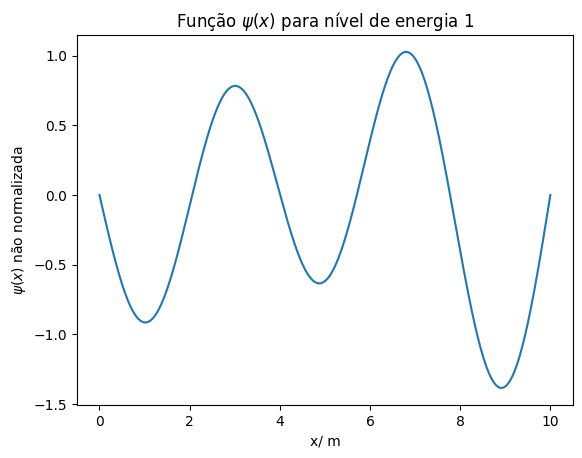

Nível de energia 2 obtido com precisão 0.001 para M = 7.


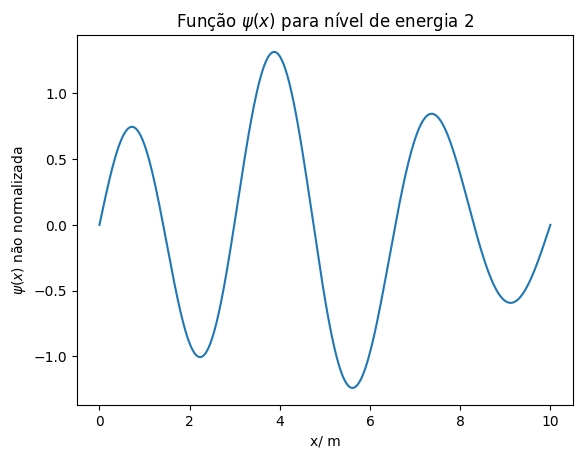

Nível de energia 3 obtido com precisão 0.001 para M = 8.


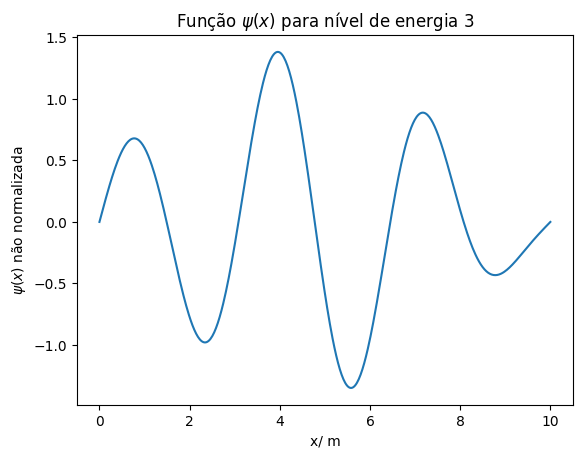

In [ ]:
# Parâmetros (SI)
a = 1 
L = 10

def psigen(n: int, eps: float=1e-3, MMax: int=40, N=2000) -> Callable:
    """
        Gera a função de onda `psi(x)` não normalizada para o nível $n$ (nº menor autovalor a contar de `n=0`) com um erro no autovalor menor que `eps` e usando M <= MMax.

        Calcula os integrais usando a regra de Simpson com INT passos.
    """
    global L

    # Definir vec
    vec = []

    # Temos de ter no mínimo uma matriz n por n para calcular o autovalor n
    MStart = n + 1

    energiaold = - eps - 1
    for M in range(MStart, MMax):
        H = hamiltoniano(M, Vhat, N)

        # Determinar autovalores de mais baixa energia
        val, vec = eigenfinder(H)
        val = np.sort(val)

        energia = val[n]

        # Calcular erro
        erro = abs(energia - energiaold)
        if erro < eps:
            print(f"Nível de energia {n+1} obtido com precisão {eps} para M = {M}.")
            break

        energiaold = energia
    
    # Temos de novo de ter cuidado com os índices algébricos/ Python
    vec = vec[n]
    M = len(vec)
    return lambda x: np.sum(np.array([vec[i-1] * np.sin(np.pi * i * (x/L)) for i in range(1, M + 1)]), axis=0)


# Representar cada nível
for nivel in range(3):
    psi = psigen(nivel)

    xx = np.linspace(0, L, 500)
    yy = psi(xx)

    plt.plot(xx, yy)
    plt.title(f"Função $\\psi(x)$ para nível de energia {nivel + 1}")
    plt.xlabel("x/ m")
    plt.ylabel("$\\psi(x)$ não normalizada")
    plt.show()

# Problema 2

## Alínea 2.1

Começamos por escrever do seguinte modo a EDO:

$$
\begin{align*}
\frac{d\textbf r}{dt} &= \textbf v
\\\\
\frac{d\textbf v}{dt} &= -g\textbf e_y - \frac{\gamma}{m}|\textbf v|(v_x\textbf e_x + v_y\textbf e_y)
\end{align*}
$$

Separamos agora as componentes vetoriais:
$$
\begin{align*}
\frac{dx}{dt} &= v_x
\\\\
\frac{dy}{dt} &= v_y
\\\\\\
\frac{dv_x}{dt} &= - \frac{\gamma}{m}v_x\sqrt{v_x^2 + v_y^2}
\\\\
\frac{dv_y}{dt} &= -g - \frac{\gamma}{m}v_y\sqrt{v_x^2 + v_y^2}
\end{align*}
$$

As condições iniciais são:
$$
\begin{align*}
x(0) &= 0
\\\\
y(0) &= h
\\\\
v_x(0) &= \cos(\theta)v_0
\\\\
v_y(0) &= \sin(\theta)v_0
\end{align*}
$$


Podemos então resolver este sistema de 4 EDOs usando o método de Runge-Kutta!

In [ ]:
# Parâmetros
h = 1
theta = np.pi/6
gammam = 0.4
L = 10


def rk4a(start: float, end: float, func: Callable, eps: float, x0: np.ndarray, h0: float=1e-6, el: bool=False) -> tuple[np.ndarray, np.ndarray, str]:
    """
        Resolve a equação diferencial `dx/dt = func(x, t)` usando o método de Runge-Kutta Adaptativo de Ordem 4 começando em `start` e terminando em `end` com erro total `eps` sendo `x(start) = x0` e sendo o primeiro passo de comprimento h. Usa extrapolação local se `el` for `True`.

        A função `func` deve aceitar dois argumentos: um float `x` e um float `t`. O argumento `x0` deve também ser um float.

        Esta função foi adaptada a partir da minha função geral, ela termina quando `y <= 0` ou quando `x >= L` 

        ### Retorno
        tt: Array com os valores da variável independente `t`
        xx: Array com os resultados em função de `t`
    """
    global L

    # Número de variáveis em jogo
    nvars = len(np.array(x0))

    # Erro por unidade de tempo
    delta = eps / (end - start)

    # Array onde vamos guardar a solução final
    tt = [start]
    xx = [x0]

    # Passo RK4
    def passo(xn: np.ndarray, tn: float, func: Callable, h: float) -> np.ndarray:
        k1 = func(xn, tn)
        k2 = func(xn + h/2 * k1, tn + h/2)
        k3 = func(xn + h/2 * k2, tn + h/2)
        k4 = func(xn + h * k3, tn + h)
        
        return xn + h * (k1 + 2*k2 + 2*k3 + k4)/6
    

    # Ajustar h de forma limitada (não permitir que h mais que duplique)
    def novoh(velhoh: float, rho: float) -> float:
        valorh, limiteh = velhoh * rho**(1/4), 2 * h
        
        return valorh if abs(valorh) < abs(limiteh) else limiteh


    # Guarda onde o corpo acertou
    acertou = ""

    # Valor inicial de x, t e de h
    xstart = x0
    tstart = start
    h = h0

    toend = False
    while True:
        # Dois passos de tamanho h
        xtemp = passo(xstart, tstart, func, h)
        x1h = passo(xtemp, tstart + h, func, h)

        # Um passo de tamanho 2h
        x2h = passo(xstart, tstart, func, 2 * h)


        # Calcular erros em cada variável
        epsvars = np.array(abs(x1h - x2h) / 30)
        
        # Expressão para o erro total, depende do problema!
        # Como nos interessa quer a posição quer a velocidade e estes são vetores usamos a expressão da distância euclidiana
        epspasso = np.sqrt(np.sum(epsvars ** 2))
        
        
        # Evitar erro de divisão por 0
        epspasso = max(epspasso, 1e-16)

        # Calcular rho
        rho = float(abs(h * delta) / abs(epspasso))

        # A precisão foi melhor que o necessário
        if rho > 1:
            # Guardar os valores
            if el:
                tt += [tstart + h, tstart + 2 * h]
                xx += [xtemp + epsvars, x1h + 2 * epsvars]
            else:
                tt += [tstart + h, tstart + 2 * h]
                xx += [xtemp, x1h]

            # Avançar o tempo
            tstart = tt[-1]
            xstart = xx[-1]
            
            # Ajustar h
            h = novoh(h, rho)
        
            # Terminar caso y <= 0 ou x >= L
            if xx[-1][0] >= L:
                acertou = "Parede"
                break
            elif xx[-1][1] <= 0:
                acertou = "Chão"
                break

            if toend:
                break

        # A precisão foi pior que o necessário
        else:
            # Ajustar h
            # Aqui multiplicamos por 0.99 para evitar que caso rho ~ 1 o valor de h não se altere e o programa entre em loop infinito
            h = 0.99 * novoh(h, rho)

            # Afinal não deve terminar ainda pois o h não era bom o suficiente
            toend = False
            
        
        # Certificar que há um ponto em t = end
        if (h > 0 and tstart + 2 * h >= end) or (h < 0 and tstart + 2 * h <= end):
            # Selecionar um h adequado (será sempre menor ou igual ao h atual, pelo que o programa irá de facto terminar!)
            h = (end - tstart) / 2
            
            # Flag para terminar o processo na próxima iteração
            toend = True
    
    return np.array(tt), np.array(xx), acertou

O corpo parou porque acertou no/a Chão


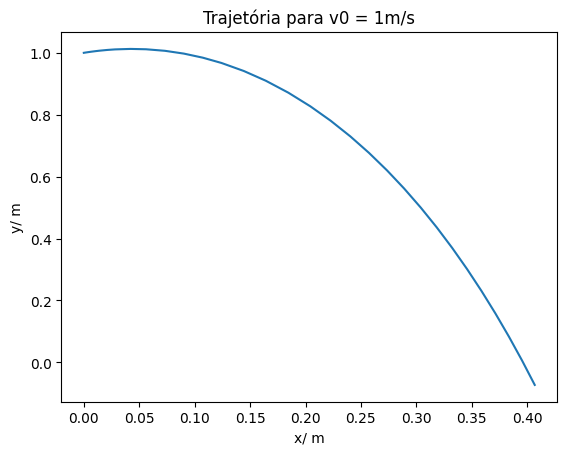

O corpo parou porque acertou no/a Chão


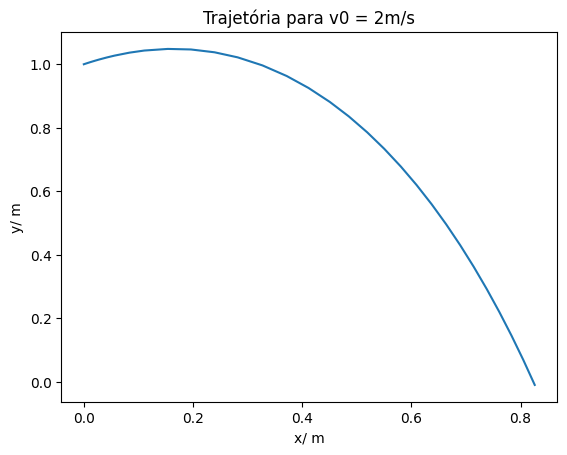

O corpo parou porque acertou no/a Chão


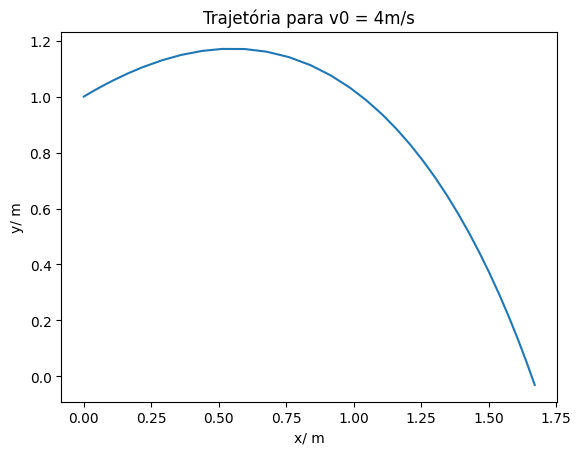

O corpo parou porque acertou no/a Chão


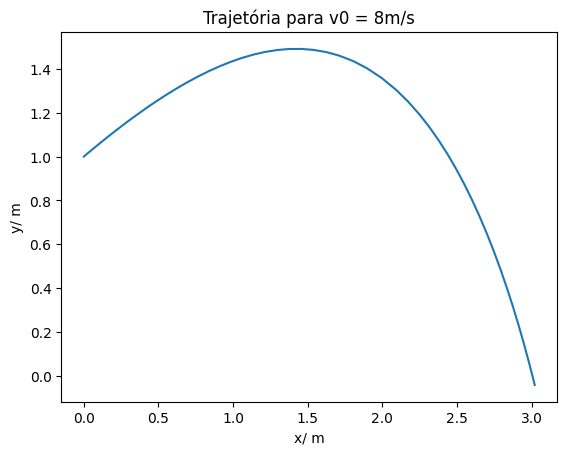

O corpo parou porque acertou no/a Chão


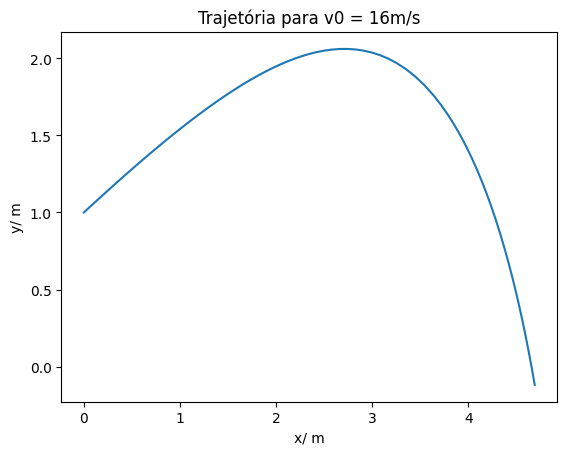

O corpo parou porque acertou no/a Chão


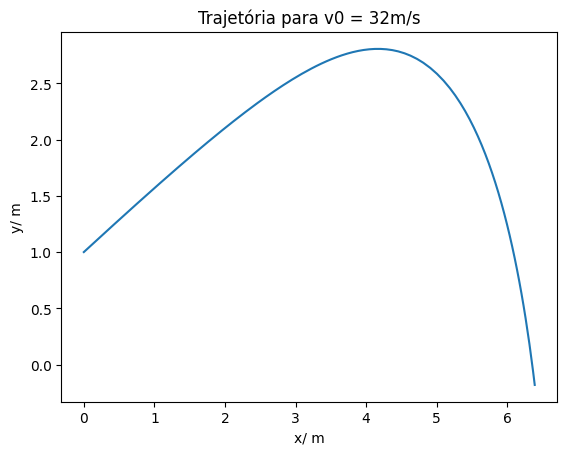

O corpo parou porque acertou no/a Chão


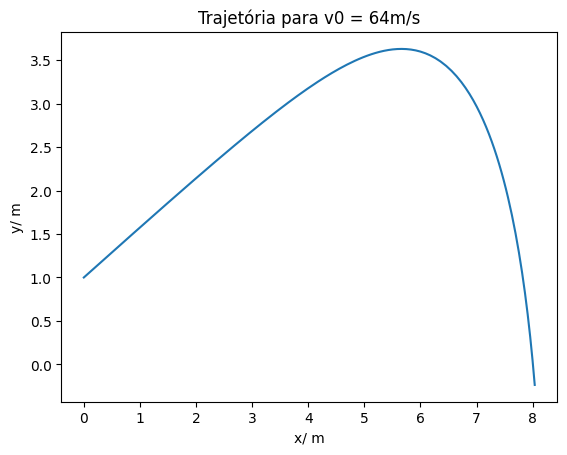

O corpo parou porque acertou no/a Chão


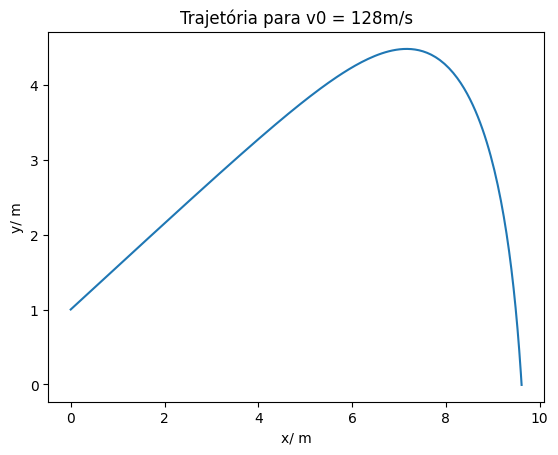

O corpo parou porque acertou no/a Parede


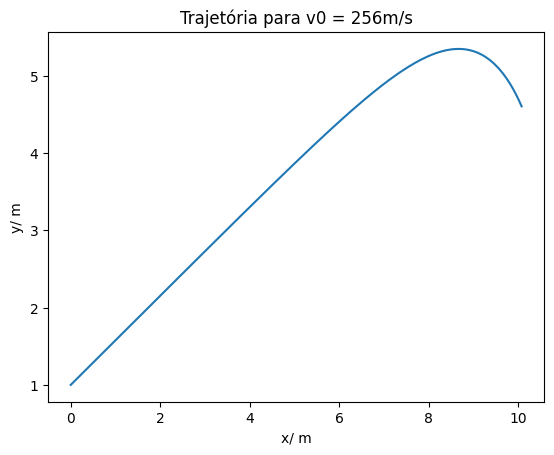

O corpo parou porque acertou no/a Parede


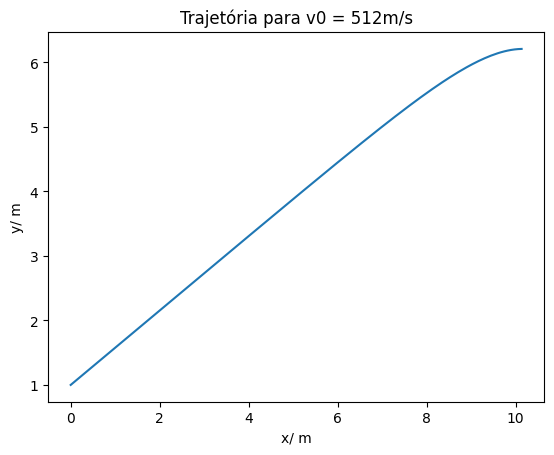

O corpo parou porque acertou no/a Parede


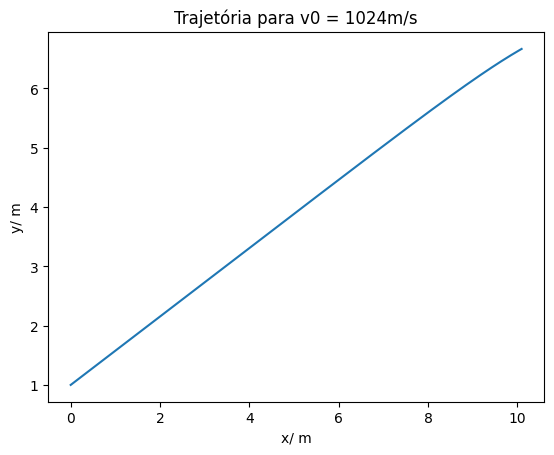

In [ ]:
# Parâmetros
h = 1
theta = np.pi/6
gammam = 0.4
g = 9.81
L = 10


# Devolve a função que contém o lado direito do sistema de EDOs acima
def rhs2(xx: np.ndarray, t: float) -> np.ndarray:
    global h, theta, gammam, g
    x, y, vx, vy = xx[0], xx[1], xx[2], xx[3]

    v = np.sqrt(vx**2 + vy**2)
    return np.array([vx, vy, -gammam * vx * v, -g - gammam * vy * v])


def condiniciais(v0: float) -> np.ndarray:
    global h, theta, gammam, g

    return np.array([0, h, v0 * np.cos(theta), v0 * np.sin(theta)])


for v0 in 2**np.arange(0, 11):
    # Obter o problema
    cond = condiniciais(v0)

    # Paramos a simulação caso t > 100s
    tt, sol, acertou = rk4a(0, 100, rhs2, 1e-4, cond)

    # Posição
    xx = [item[0] for item in sol]
    yy = [item[1] for item in sol]

    # Gráfico
    print(f"O corpo parou porque acertou no/a {acertou}")
    plt.plot(xx, yy)
    plt.title(f"Trajetória para v_0 = {v0}m/s")
    plt.xlabel("x/ m")
    plt.ylabel("y/ m")
    plt.show()

## Alínea 2.2

A potência associada à força de arrasto $\textbf F_a $ é:

$$
P_a = \textbf F_a \cdot \textbf v
$$

Pelo que podemos determinar o seu trabalho integrando para todo o tempo.

---

O teorema de energia cinética diz que:
$$
\Delta E_c = W
$$

O trabalho do peso é simétrico da variação da energia potencial gravítica pelo que:
$$
\Delta E_c = W_p + W_a \Leftrightarrow W_a = \Delta E_c + \Delta E_{pg}
$$

Divindo pela massa temos:

$$
W_a/m = \left(\frac12v^2 - \frac12v_0^2\right) + g\Delta h
$$


In [ ]:
# Parâmetros
h = 1
theta = np.pi/6
gammam = 0.4
g = 9.81
L = 10

for v0 in 2**np.arange(0, 11):
    # Obter o problema
    cond = condiniciais(v0)

    tt, sol, acertou = rk4a(0, 100, rhs2, 1e-6, cond)

    # Posição
    xx = [item[0] for item in sol]
    yy = [item[1] for item in sol]

    # Velocidade
    vx = np.array([item[2] for item in sol])
    vy = np.array([item[3] for item in sol])
    
    # Recuperar a força de arrasto em t (força / massa)
    ffx, ffy = [], []
    for index, t in enumerate(tt):
        _, _, fx, fy = rhs2(np.array([xx[index], yy[index], vx[index], vy[index]]), t)

        ffx += [fx]
        ffy += [fy + g]

    ffx, ffy = np.array(ffx), np.array(ffy)
    
    # Calcular o integral usando a regra do trapézio
    integrando = vx * ffx + vy * ffy

    total = 0
    for index, t in enumerate(tt[:-1]):
        hintegral = tt[index + 1] - tt[index]

        total += (hintegral/2) * (integrando[index] + integrando[index + 1])
    
    # Comparar com o valor previsto pelo teorema
    vf = np.sqrt(vx[-1]**2 + vy[-1]**2)

    deltaEc = (1/2) * (vf**2 - v0**2)
    if acertou == "Parede":
        deltaEpg = g * yy[-1] - g * h
    else:
        deltaEpg = g * 0 - g * h

    print(f"Para v0 = {v0:>4}m/s o valor previsto pelo teorema é {deltaEc + deltaEpg:>10.2f}J/kg e o valor obtido é {total:>10.2f}J/kg sendo que foram usados {len(tt)} intervalos de integração.")

# Vemos que os valores têm um erro relativo pequeno, ou seja, concordam!

Para v0 =    1m/s o valor previsto pelo teorema é      -3.32J/kg e o valor obtido é      -3.53J/kg sendo que foram usados 101 intervalos de integração.
Para v0 =    2m/s o valor previsto pelo teorema é      -4.40J/kg e o valor obtido é      -4.85J/kg sendo que foram usados 103 intervalos de integração.
Para v0 =    4m/s o valor previsto pelo teorema é      -9.78J/kg e o valor obtido é      -9.87J/kg sendo que foram usados 113 intervalos de integração.
Para v0 =    8m/s o valor previsto pelo teorema é     -32.73J/kg e o valor obtido é     -32.96J/kg sendo que foram usados 159 intervalos de integração.
Para v0 =   16m/s o valor previsto pelo teorema é    -127.66J/kg e o valor obtido é    -128.25J/kg sendo que foram usados 249 intervalos de integração.
Para v0 =   32m/s o valor previsto pelo teorema é    -510.83J/kg e o valor obtido é    -511.51J/kg sendo que foram usados 383 intervalos de integração.
Para v0 =   64m/s o valor previsto pelo teorema é   -2046.31J/kg e o valor obtido é   -2

## Alínea 2.3

Vamos usar o método da bisseção para encontrar o valor pedido.

O corpo parou porque acertou no/a Parede


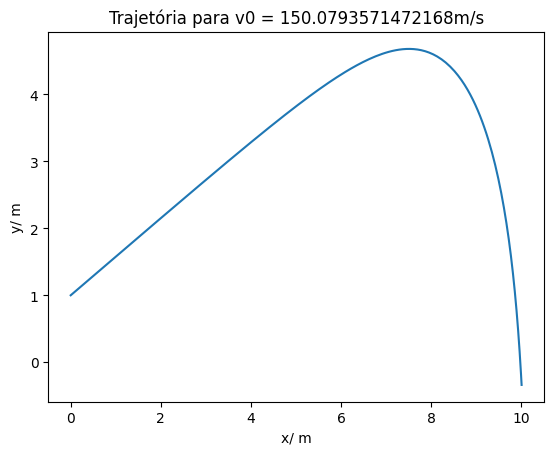

A velocidade mínima para atingir a parede é 150.08m/s


In [ ]:
eps = 1e-3
erro = eps + 1

vmin = 2
vmax = 1024
while abs(erro) > eps:
    v0 = (vmin + vmax) / 2

    # Obter o problema
    cond = condiniciais(v0)

    # Paramos a simulação caso t > 100s
    tt, sol, acertou = rk4a(0, 100, rhs2, 1e-4, cond)
    
    # Velocidade demasiado elevada
    if acertou == "Parede":
        vmax = v0
    
    # Velocidade demasiado baixa
    else:
        vmin = v0
    
    # Erro da estimativa
    erro = (vmax - vmin) /2



# Posição
xx = [item[0] for item in sol]
yy = [item[1] for item in sol]

# Gráfico
print(f"O corpo parou porque acertou no/a {acertou}")
plt.plot(xx, yy)
plt.title(f"Trajetória para v_0 = {v0}m/s")
plt.xlabel("x/ m")
plt.ylabel("y/ m")
plt.show()
print(f"A velocidade mínima para atingir a parede é {(vmin + vmax) / 2:.2f}m/s")

## Alínea 2.4

O campo elétrico é dado por (o plano está em $y=0$):
$$
\begin{align*}
\textbf E(x, y) &= \frac1{2\pi\varepsilon_0}\int_0^L \sigma(x)\frac{(x-x')\textbf e_x + y\textbf e_y}{(x-x')^2 + y^2}\ dx'
\end{align*}
$$

Em cada componente temos então:

$$
\begin{align*}
E_x(x, y) &= \frac1{2\pi\varepsilon_0}\int_0^L \sigma_0\sin(2\pi x/\lambda)\frac{(x-x')}{(x-x')^2 + y^2}\ dx'
\\\\
E_y(x, y) &= \frac1{2\pi\varepsilon_0}\int_0^L \sigma_0\sin(2\pi x/\lambda)\frac{y}{(x-x')^2 + y^2}\ dx'
\end{align*}
$$

A força sentida pela partícula é:
$$
\begin{align*}
\textbf F(x, y) = q\textbf E(x, y)
\end{align*}
$$

Pelo que a aceleração irá verificar:
$$
\begin{align*}
a_x(x, y) &= \frac{\sigma_0 q}{2\pi\varepsilon_0m}\int_0^L \frac{\sin(2\pi x/\lambda)(x-x')}{(x-x')^2 + y^2}\ dx'
\\\\
a_y(x, y) &= \frac{\sigma_0 q}{2\pi\varepsilon_0m}\int_0^L \frac{\sin(2\pi x/\lambda)y}{(x-x')^2 + y^2}\ dx'
\end{align*}
$$


O corpo parou porque acertou no/a Chão


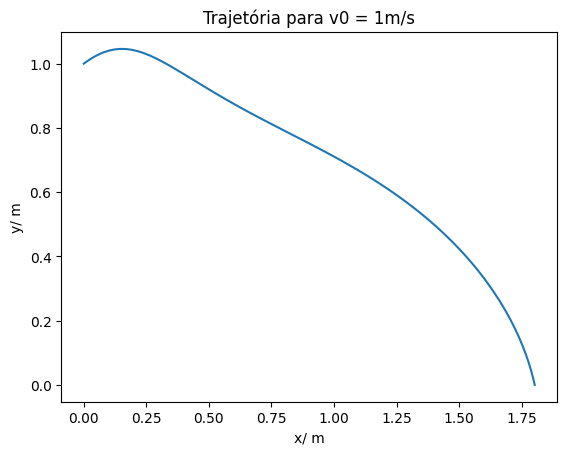

O corpo parou porque acertou no/a Chão


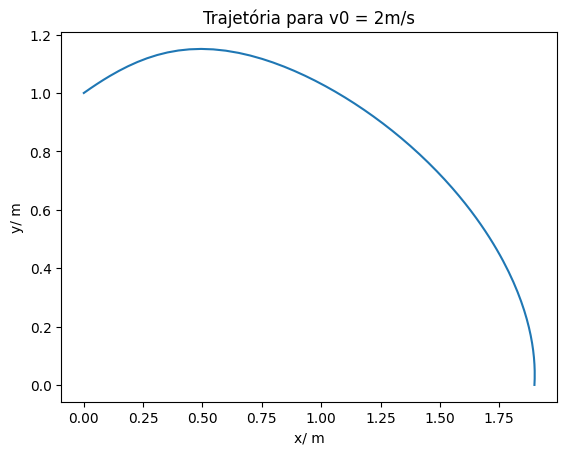

O corpo parou porque acertou no/a Chão


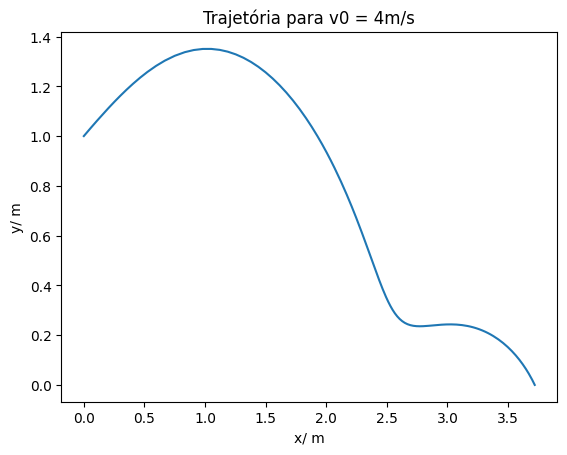

O corpo parou porque acertou no/a Chão


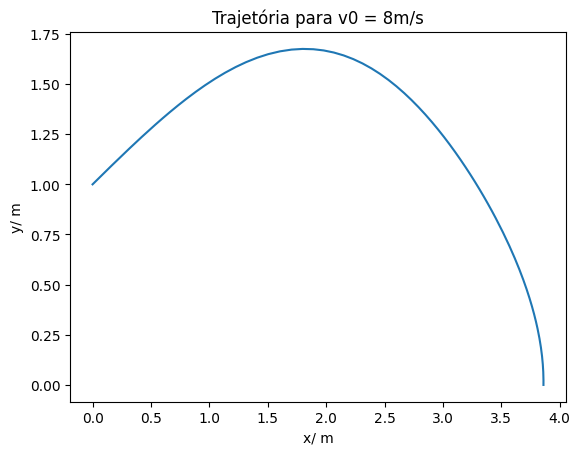

O corpo parou porque acertou no/a Chão


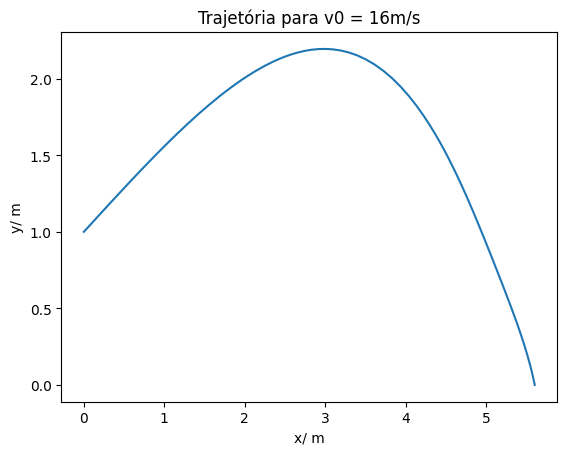

O corpo parou porque acertou no/a Chão


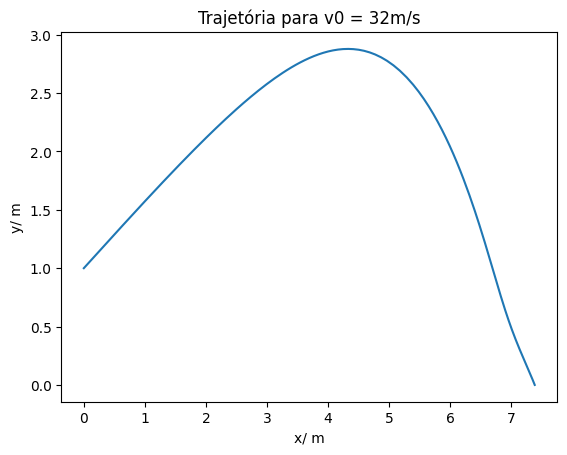

O corpo parou porque acertou no/a Chão


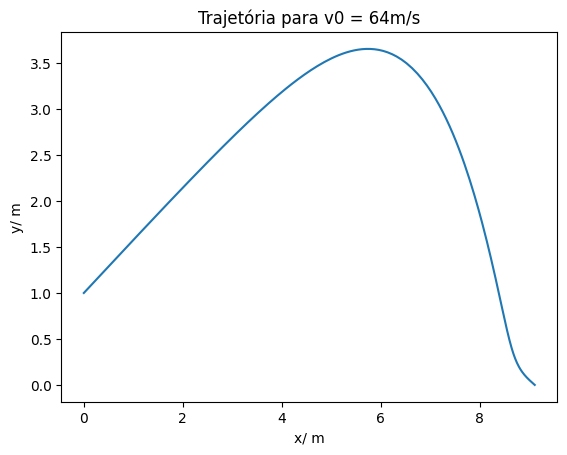

O corpo parou porque acertou no/a Chão


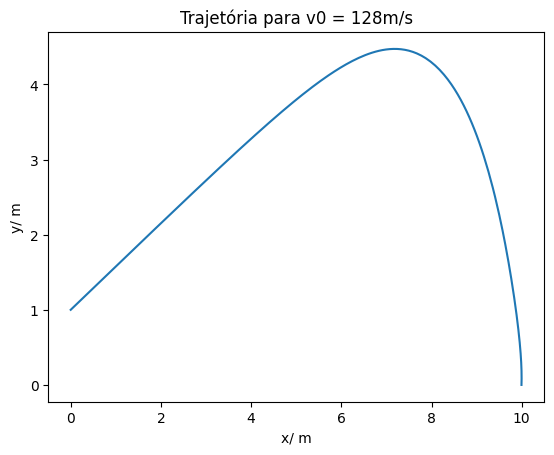

O corpo parou porque acertou no/a Parede


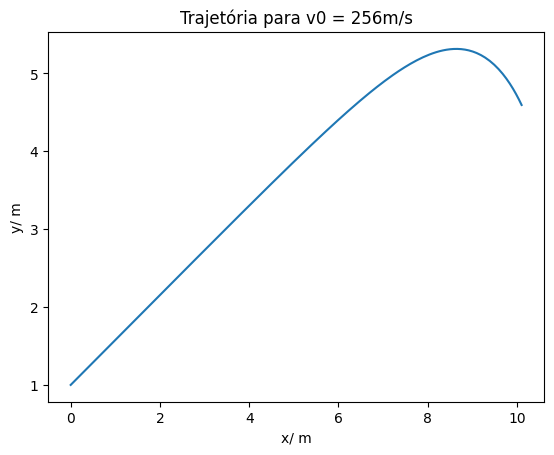

O corpo parou porque acertou no/a Parede


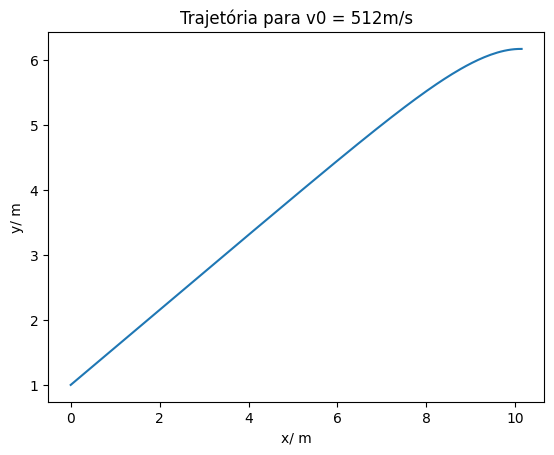

O corpo parou porque acertou no/a Parede


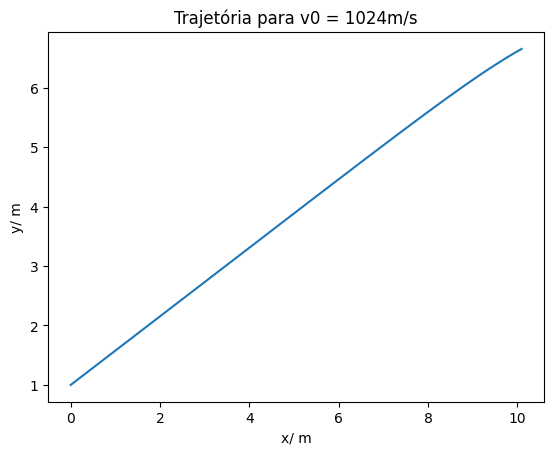

In [ ]:
# Parâmetros
h = 1
theta = np.pi/6
gammam = 0.4
g = 9.81
lamb = 2
L = 10


# Devolve a função que contém o lado direito do sistema de EDOs acima
def rhs24(xx: np.ndarray, t: float) -> np.ndarray:
    global h, theta, gammam, g
    x, y, vx, vy = xx[0], xx[1], xx[2], xx[3]

    # Resolver o integral na variável de integração t = x'
    argsin = 2 * np.pi / lamb
    ax = 20 * simpson(0, L, lambda t: (np.sin(argsin * t) * (x-t)) / ((x - t)**2 + y**2), 2000)
    ay = 20 * simpson(0, L, lambda t: (np.sin(argsin * t) * y) / ((x - t)**2 + y**2), 2000)

    v = np.sqrt(vx**2 + vy**2)
    return np.array([vx, vy, -gammam * vx * v + ax, -g - gammam * vy * v + ay])


for v0 in 2**np.arange(0, 11):
    # Obter o problema
    cond = condiniciais(v0)

    # Paramos a simulação caso t > 100s
    tt, sol, acertou = rk4a(0, 100, rhs24, 1e-4, cond)

    # Posição
    xx = [item[0] for item in sol]
    yy = [item[1] for item in sol]

    # Gráfico
    print(f"O corpo parou porque acertou no/a {acertou}")
    plt.plot(xx, yy)
    plt.title(f"Trajetória para v_0 = {v0}m/s")
    plt.xlabel("x/ m")
    plt.ylabel("y/ m")
    plt.show()

# Apenas as trajetórias com menor velocidade são significativamente afetadas pela adição do campo elétrico, nos restantes casos a partícula afasta-se muito rapidamente do campo!